In [9]:
# Install a pip package in the current Jupyter kernel
import sys
# !{sys.executable} -m pip install lightkurve

In [3]:
import lightkurve as lk

In [ ]:
# Kepler 10

/home/ubuntu/anaconda3/lib/python3.8/site-packages/lightkurve/search.py:228: LightkurveWarning: Warning: 16 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn('Warning: {} files available to download. '


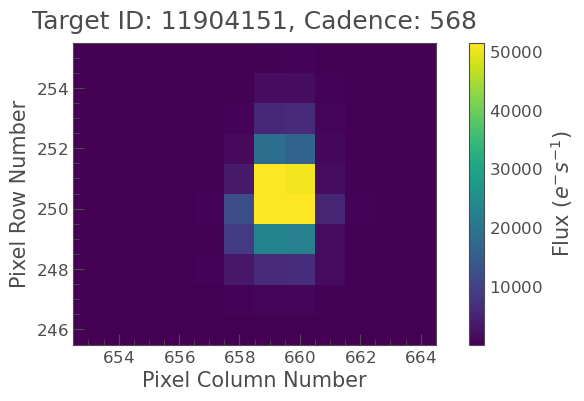

In [4]:
pixels = lk.search_targetpixelfile("Kepler-10").download()
pixels.plot()

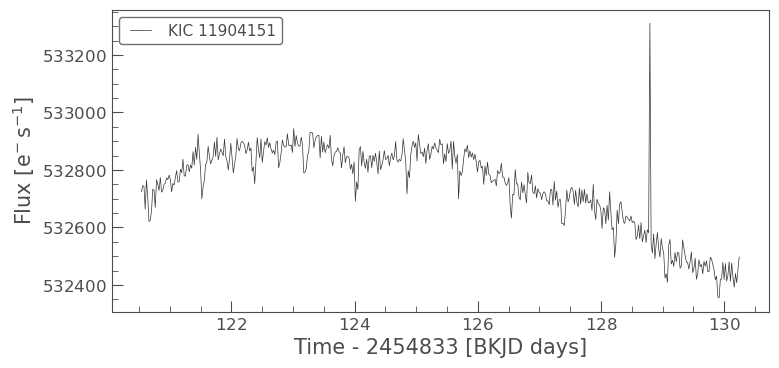

In [5]:
lightcurve = pixels.to_lightcurve()
lightcurve.plot()

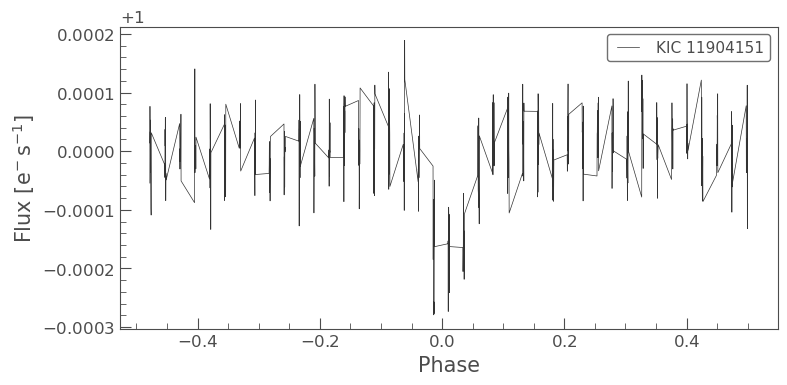

In [8]:
exoplanet = lightcurve.flatten().remove_outliers().fold(period=0.838)
exoplanet.plot()

In [10]:
# TESS

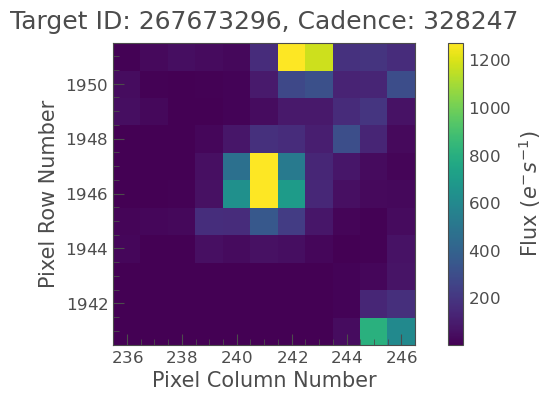

In [35]:
pixels = lk.search_targetpixelfile(target="TIC 267673296", mission="TESS").download()
pixels.plot()

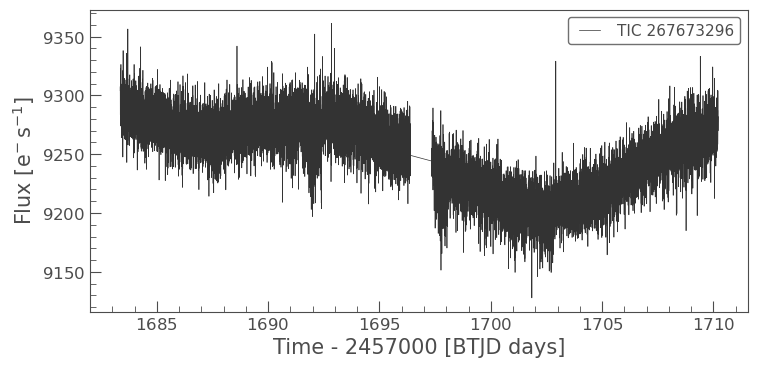

In [36]:
lightcurve = pixels.to_lightcurve()
lightcurve.plot()

In [ ]:
exoplanet = lightcurve.flatten().remove_outliers().fold(period=9.286973952)
exoplanet.plot()